<a href="https://colab.research.google.com/github/00ber/ml-projects/blob/main/FashionMNIST_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [13]:

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [43]:
latent_dim_size = 60 

class Autoencoder(Model):
  def __init__(self, latent_dim_size):
    super(Autoencoder, self).__init__()
    self.latent_dim_size = latent_dim_size   
    self.encoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, 1, activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(latent_dim_size)
    ])
    self.decoder = tf.keras.Sequential([
        layers.InputLayer(input_shape=(latent_dim_size,)),
        layers.Dense(784, activation='relu'),
        layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim_size)

In [44]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [45]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
1875/1875 [==============================] - 71s 37ms/step - loss: 0.0193 - val_loss: 0.0117
Epoch 2/20
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 3/20
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 4/20
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/20
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0094 - val_loss: 0.0094
Epoch 6/20
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 7/20
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 8/20
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 9/20
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0090 - val_loss: 0.0089
Epoch 10/20
1875/1875 [==============================] - 68s 36m

In [46]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

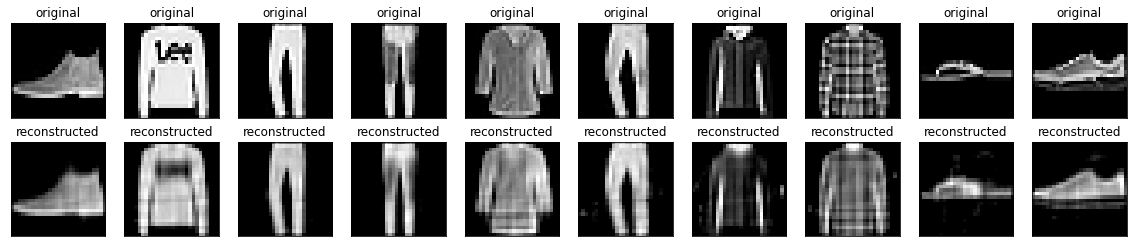

In [47]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()